# kNN Model

For this project, I have tested the performance of kNN with k = 1, 3, 5 on the training data set. It turns out it is not working really well on this data set, as the auc score is very close to 0.5 even with increasing of k, which means the predictions we get from the model is not much better than guessing. This is due to the imbalanced classes of target, this dataset has more than 96% of zeros in the targets.

In my experiment I have tried the bagging and resampling strategies to impprove my kNN model, however kNN model is not very suitable for bagging and boosting, as it is too stable when k is bigger than 1, I have tried bagging with 1-NN model however it doesn't improve much. I have compared over-sampling and under-sampling, I found out under-sampling works a little bit better than oversampling, I think that this is because the size of our data set is huge, so lossing information is better than adding noise to our modelling.

In this file, I will include my result of kNN models trainned on full train dataset and on the under-sampled train dataset.

In [4]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler #for standardizing data
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  roc_curve,auc
from sklearn.model_selection import StratifiedKFold, train_test_split,cross_val_score,cross_val_predict
from numba import jit
import random

In [5]:
@jit
def gini(y_true, y_prob):
    y_true = np.asarray(y_true)
    y_true = y_true[np.argsort(y_prob)]
    ntrue = 0
    gini = 0
    delta = 0
    n = len(y_true)
    for i in range(n-1, -1, -1):
        y_i = y_true[i]
        ntrue += y_i
        gini += y_i * delta
        delta += 1 - y_i
    gini = 1 - 2 * gini / (ntrue * (n - ntrue))
    return gini

## Import the train and test data sets

In [31]:
train = pd.read_csv('Dataset/ImputeTrain.csv')
test = pd.read_csv('Dataset/ImputeTest.csv')

In [32]:
(train['target']==0).sum()/train.shape[0] #percentage of zeros in our labels

0.9637216095553629

## kNN models with full train data set

In [33]:
y_train = train['target'].values
X_train = train.drop(['target', 'id'], axis=1)

X_train = pd.DataFrame(X_train)
y_train=y_train.ravel()
#separate labels and other variables into X and y, drop 'id'

In [34]:
scaler = StandardScaler()
scaled_train0= scaler.fit_transform(X_train)
X_train = pd.DataFrame(scaled_train0, columns=X_train.columns)
#standardizng is necessary for kNN models

In [35]:
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
#define the cross validation that I am going to use is with k = 5
knn_model1 = KNeighborsClassifier(n_neighbors=1)
knn_model3 = KNeighborsClassifier(n_neighbors=3)
knn_model5 = KNeighborsClassifier(n_neighbors=5)
#define my models

#### Warning: The scores of 5-fold cross validation with full train set takes a long time to run,  you can choose to read the cvs file instead.

In [ ]:
scores = []
scores1 = cross_val_score(knn_model1, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
scores.append(scores1)

In [ ]:
scores3 = cross_val_score(knn_model3, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
scores.append(scores3)

In [ ]:
scores5 = cross_val_score(knn_model5, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
scores.append(scores5)

In [ ]:
auc_full = pd.DataFrame(scores,columns=['1st_fold', '2nd_fold', '3rd_fold','4th_fold','5th_fold'])
#turn the arrays of scores into dataframe
auc_full.to_csv('csv_files/auc_full_training_set.csv', index = False)
#save dataframe as csv

You can choose to read the csv file that I have saved by running the code below.

In [36]:
auc_full = pd.read_csv('csv_files/auc_full_training_set.csv')
#read the csv file saved

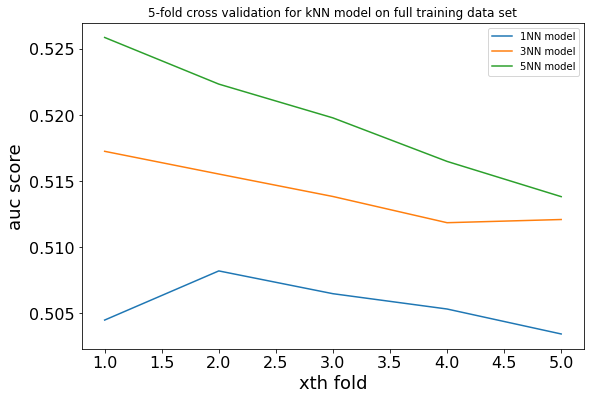

In [37]:
plt.figure(figsize=(9,6))
x = [1,2,3,4,5]
y1 = auc_full.iloc[0].ravel()
y2 = auc_full.iloc[1].ravel()
y3 = auc_full.iloc[2].ravel()
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.legend(['1NN model','3NN model','5NN model'])
plt.title ('5-fold cross validation for kNN model on full training data set')
plt.xlabel("xth fold", fontsize = 18)
plt.ylabel("auc score", fontsize = 18)
plt.tick_params(labelsize = 16)

plt.show()
#plot of the auc score for kNN model with full train data set with k = 1,3,5

We can see that although increasing the number of k for our kNN model do improve the auc scores, but it is insignificant.

## kNN models with under sampled train set
This section includes my coding for performing under sampling, and model performance on a under-sampled training data set.

In [38]:
train = pd.read_csv('Dataset/imputetrain.csv')
#import the train data set again, because we want to under sampling our train data before standardizing

In [39]:
count_class_0, count_class_1 = train.target.value_counts()
#count number of zeros and ones in our targets
df_class_0 = train[train['target'] == 0]
df_class_1 = train[train['target'] == 1]
#separate train data set into the data with targets one and data with targets zero

In [40]:
random.seed(10) #make sure the sampling result is the same, hence all the prediction and auc scores will be the same everytime we run the code
df_class_0_under = df_class_0.sample(count_class_1)
#simple the number of zeros is more than number of ones, we randomly sample the data with targets zero, so that we have the same number of zeros and ones in our train data set
train_under = pd.concat([df_class_0_under, df_class_1], axis=0)
#combine the data set with targets one and the undersampled data set with targets zero together, this is our undersampled train data set

In [41]:
y_train_under = train_under['target'].values
X_train_under = train_under.drop(['target', 'id'], axis=1)

X_train_under = pd.DataFrame(X_train_under)
y_train_under=y_train_under.ravel()
#similarly, separate labels and other variables into X and y, drop 'id'

In [42]:
scaler = StandardScaler()
scaled_train0= scaler.fit_transform(X_train_under)
X_train_under = pd.DataFrame(scaled_train0, columns=X_train_under.columns)
#standardize our undersampled train data set

Random under-sampling:
1    16195
0    16195
Name: target, dtype: int64


<AxesSubplot:title={'center':'Count (target)'}>

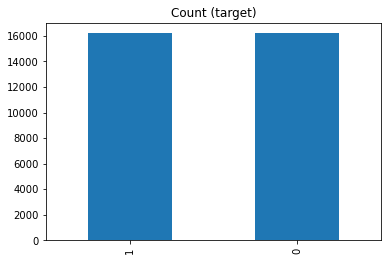

In [43]:
print('Random under-sampling:')
print(train_under.target.value_counts())

train_under.target.value_counts().plot(kind='bar', title='Count (target)')
#from the plot below, we can see that in our undersampled train data set we have same number of samples with targets zero and with targets one

Warning: following takes a long time to run, you can choose to load the csv below instead

In [ ]:
scores = []
under_scores1 = cross_val_score(knn_model1, X_train_under, y_train_under, scoring='roc_auc', cv=cv, n_jobs=-1)
print(under_scores1)
scores.append(under_scores1)

In [ ]:
under_scores3 = cross_val_score(knn_model3, X_train_under, y_train_under, scoring='roc_auc', cv=cv, n_jobs=-1)
print(under_scores3)
scores.append(under_scores3)

In [ ]:
under_scores5 = cross_val_score(knn_model5, X_train_under, y_train_under, scoring='roc_auc', cv=cv, n_jobs=-1)
print(under_scores5)
scores.append(under_scores5)

In [ ]:
print(scores)
#train the kNN models with undersampled train data set, and collect the auc score

In [ ]:
auc_under = pd.DataFrame(scores,columns=['1st_fold', '2nd_fold', '3rd_fold','4th_fold','5th_fold'])
auc_under.to_csv('csv_files/auc_under_sampled_training_set.csv', index = False)
#turn the auc scores into data frame and save it as a csv file

If you did not run the code above, load results from csv

In [44]:
auc_under = pd.read_csv('csv_files/auc_under_sampled_training_set.csv')
#read the csv file saved

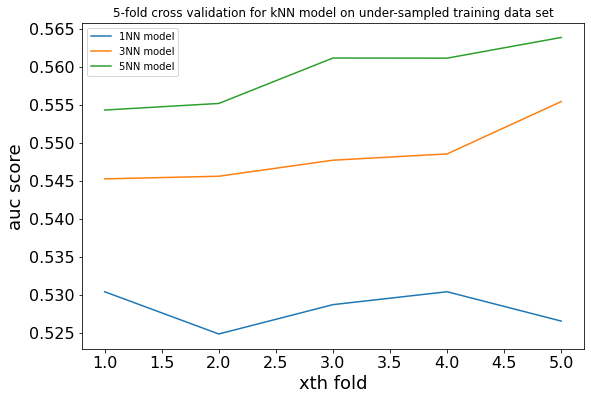

In [45]:
plt.figure(figsize=(9,6))
x = [1,2,3,4,5]
y1 = auc_under.iloc[0].ravel()
y2 = auc_under.iloc[1].ravel()
y3 = auc_under.iloc[2].ravel()
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.legend(['1NN model','3NN model','5NN model'])
plt.title ('5-fold cross validation for kNN model on under-sampled training data set')
plt.xlabel("xth fold", fontsize = 18)
plt.ylabel("auc score", fontsize = 18)
plt.tick_params(labelsize = 16)

plt.show()
#plot of the auc score for kNN model with undersampled train data set with k = 1,3,5

## Conclusion

In [46]:
X_test = test.drop(['target','id'], axis=1)
X_test = pd.DataFrame(X_test)
y_test = test['target'].values

scaler = StandardScaler()
scaled_test0 = scaler.fit_transform(X_test)
X_test = pd.DataFrame(scaled_test0, columns=X_test.columns)
#separate X and y for our test data set, standardize the X for kNN model to make prediction

In [47]:
under_kNNmodel_5 = KNeighborsClassifier(n_neighbors=5)
under_kNNmodel_5.fit(X_train_under,y_train_under)
y_predicts = under_kNNmodel_5.predict_proba(X_test)
y_predicts.to_csv('Results/knns.csv')
gini_score = gini(y_test,y_predicts['1'])
#for a gini score, we inout the probabilities of predicting one for each test sample, so we need to use .predict_proba, and it will be the second column of the outputs
print(gini_score)
#so this is the gini score for my submission model on the test data

AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'

In [ ]:
fpr, tpr, threshold = roc_curve(y_test,under_kNNmodel_5.predict(X_test))
auc_score = auc(fpr, tpr)
print(auc_score)
#calculate the auc score on the test data

The model above is my chosen submission model, kNN model with k=5, trained with under sampled data set, such that we have balanced amount of zeros and ones in our train data. Although the performance is still not great.